In [1]:
#Import dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

emp_data = pd.read_csv("emp_data.csv")

print(emp_data)

   Salary_hike  Churn_out_rate
0         1580              92
1         1600              85
2         1610              80
3         1640              75
4         1660              72
5         1690              70
6         1706              68
7         1730              65
8         1800              62
9         1870              60


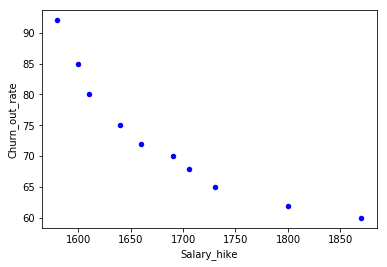

In [2]:
#visualizing the data 

emp_data.plot.scatter(y='Churn_out_rate',x='Salary_hike',c='Blue')

{'whiskers': [<matplotlib.lines.Line2D at 0x1b9533fb438>,
 'caps': [<matplotlib.lines.Line2D at 0x1b9533fbac8>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b9533ecfd0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b9533fbef0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b9534054e0>],
 'means': []}

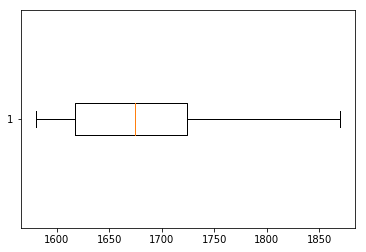

In [3]:
#box plot
#we can see that the data is skewed might require to tranfrom the data.

plt.boxplot(emp_data.Salary_hike,0,'rs',0)

{'whiskers': [<matplotlib.lines.Line2D at 0x1b953459d30>,
 'caps': [<matplotlib.lines.Line2D at 0x1b953461400>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b953459908>],
 'medians': [<matplotlib.lines.Line2D at 0x1b953461a90>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b953461dd8>],
 'means': []}

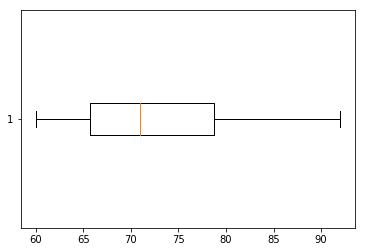

In [4]:
#box plot
#we can see that the data is skewed might require to tranfrom the data.

plt.boxplot(emp_data.Churn_out_rate,0,'rs',0)

In [5]:
# correlation value between X and Y
# Both the variables are strongly correlated as the correlation value is -0.91

emp_data.Churn_out_rate.corr(emp_data.Salary_hike)

-0.9117216186909112

In [6]:
np.corrcoef(emp_data.Salary_hike,emp_data.Churn_out_rate)

array([[ 1.        , -0.91172162],
       [-0.91172162,  1.        ]])

In [7]:
# Improting the statsmodel.formula.api for linear regression model

import statsmodels.formula.api as smf

model1=smf.ols("Churn_out_rate~Salary_hike",data=emp_data).fit()

    

In [8]:
# For getting coefficients of the varibles used in equation
model1.params

Intercept      244.364911
Salary_hike     -0.101543
dtype: float64

In [9]:
# P-values for the variables and R-squared value for prepared model
model1.summary()

C:\Users\cyadav\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     39.40
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           0.000239
Time:                        07:14:44   Log-Likelihood:                -28.046
No. Observations:                  10   AIC:                             60.09
Df Residuals:                       8   BIC:                             60.70
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     244.3649     27.352      8.934      0.000     181.291     307.439
Salary_hike    -0.1015      0.016     -6.277      0.000      -0.139      -0.064
==============================================================================
Omnibus:                        2.201   Durbin-Watson:                   0.562
Prob(Omnibus):                  0.333   Jarque-Bera (JB):                1.408
Skew:                           0.851   Prob(JB):                        0.495
Kurtosis:                       2.304   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [10]:
model1.conf_int(0.05) #at 95% confidence interval

,0,1
Intercept,181.291232,307.438591
Salary_hike,-0.138845,-0.064240


In [11]:
pred = model1.predict(emp_data.iloc[:,0])

Text(0, 0.5, 'churn rate')

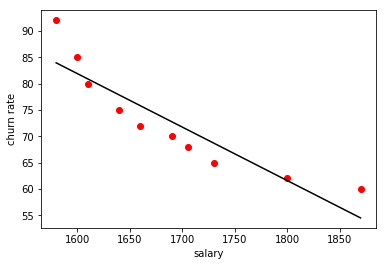

In [12]:
# Visualization of regresion line over the scatter plot of Waist and AT
# For visualization we need to import matplotlib.pyplot
import matplotlib.pylab as plt

plt.scatter(x=emp_data['Salary_hike'],y=emp_data['Churn_out_rate'],color='red');plt.plot(emp_data['Salary_hike'],pred,color='black');plt.xlabel('salary');plt.ylabel('churn rate')

In [16]:
#transforming variables for better acuracy

model2 = smf.ols("Churn_out_rate~np.log(Salary_hike)",data=emp_data).fit()
model2.params
model2.summary()

C:\Users\cyadav\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         Churn_out_rate   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     44.85
Date:                Fri, 12 Jun 2020   Prob (F-statistic):           0.000153
Time:                        07:16:48   Log-Likelihood:                -27.502
No. Observations:                  10   AIC:                             59.00
Df Residuals:                       8   BIC:                             59.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept            1381.4562    195.402      7.070      0.000     930.858    1832.054
np.log(Salary_hike)  -176.1097     26.297     -6.697      0.000    -236.751    -115.468
==============================================================================
Omnibus:                        2.213   Durbin-Watson:                   0.571
Prob(Omnibus):                  0.331   Jarque-Bera (JB):                1.418
Skew:                           0.853   Prob(JB):                        0.492
Kurtosis:                       2.298   Cond. No.                     1.10e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
print(model2.conf_int(0.01)) # 99% confidence level

                              0            1
Intercept            725.806856  2037.105529
np.log(Salary_hike) -264.347078   -87.872392


In [21]:
pred2 = model2.predict(pd.DataFrame(emp_data['Salary_hike']))
pred2.corr(emp_data.Churn_out_rate)

0.921207731211886

Text(0, 0.5, 'churn_out_rate')

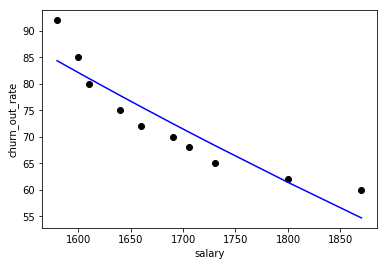

In [40]:
plt.scatter(x=emp_data['Salary_hike'],y=emp_data['Churn_out_rate'],color='Black');plt.plot(emp_data['Salary_hike'],pred2,color='Blue');plt.xlabel('salary');plt.ylabel('churn_out_rate')

In [17]:
#Exponential tranformation on the out put variable

model3 = smf.ols("np.log(Churn_out_rate)~Salary_hike",data=emp_data).fit()
model3.params
model3.summary()

C:\Users\cyadav\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     np.log(Churn_out_rate)   R-squared:                       0.874
Model:                                OLS   Adj. R-squared:                  0.858
Method:                     Least Squares   F-statistic:                     55.26
Date:                    Fri, 12 Jun 2020   Prob (F-statistic):           7.38e-05
Time:                            07:21:22   Log-Likelihood:                 16.511
No. Observations:                      10   AIC:                            -29.02
Df Residuals:                           8   BIC:                            -28.42
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.6383      0.318     20.902      0.000       5.906       7.371
Salary_hike    -0.0014      0.000     -7.434      0.000      -0.002      -0.001
==============================================================================
Omnibus:                        1.935   Durbin-Watson:                   0.585
Prob(Omnibus):                  0.380   Jarque-Bera (JB):                1.314
Skew:                           0.780   Prob(JB):                        0.519
Kurtosis:                       2.152   Cond. No.                     3.27e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.27e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [48]:
pred3 = model3.predict(pd.DataFrame(emp_data['Salary_hike']))
pred3.corr(emp_data.Churn_out_rate)


0.9117216186909108

In [49]:
pred3=np.exp(pred3)
pred3

0    84.107097
1    81.790758
2    80.656622
3    77.347701
4    75.217518
5    72.131736
6    70.538084
7    68.213379
8    61.861455
9    56.101012
dtype: float64

Text(0, 0.5, 'churn_out_rate')

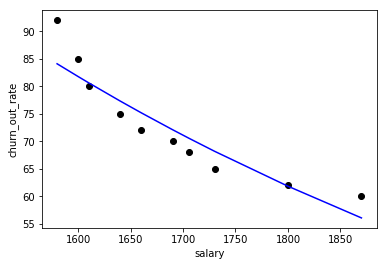

In [50]:
plt.scatter(x=emp_data['Salary_hike'],y=emp_data['Churn_out_rate'],color='Black');plt.plot(emp_data['Salary_hike'],pred3,color='Blue');plt.xlabel('salary');plt.ylabel('churn_out_rate')

In [ ]:
# Rsquared values for
# Model1 = 0.831
# Model2 = 0.849
# Model3 = 0.874

# so we will consider the model having highest R-Squared value which is the log transformation - model3